##  Mathematisch-algorithmische Grundlagen für Data Science


## Aufgabenblatt 10

&nbsp;

**Author:** &nbsp;Erik Autenrieth &nbsp;(eauten2s, 9036029)
**Author:** &nbsp;Minh Truong    &nbsp;(mtruon2s)

**Date:** &nbsp;&nbsp;&nbsp;&nbsp;  2021-06-09 09:06:00



In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import seaborn as sns
from sympy import Matrix, symbols, linsolve,simplify
from IPython.display import HTML

### Aufgabe 1 (Cops and Robbers)

In [3]:
v1 = [0.0, 0.1, 0.1, 0.8]
v2 = [0.6, 0.0, 0.0, 0.4]
v3 = [0.0, 0.0, 0.5, 0.5]
v4 = [0.6, 0.0, 0.0, 0.4]

P = np.transpose(np.array([v1, v2, v3, v4]))

In [4]:
df = pd.DataFrame(P, columns=['v1', 'v2', 'v3', 'v4'], index=
                  ['v1 (ziel)', 'v2 (ziel)', 'v3 (ziel)', 'v4 (ziel)'])
df

,v1,v2,v3,v4
v1 (ziel),0.0,0.6,0.0,0.6
v2 (ziel),0.1,0.0,0.0,0.0
v3 (ziel),0.1,0.0,0.5,0.0
v4 (ziel),0.8,0.4,0.5,0.4


In [5]:
contoletti = np.array([[1], [0], [0], [0]])  

In [6]:
from numpy.linalg import matrix_power

v1, v2, v3, v4 = [],[],[],[]

for i in range(0,15):
    tmp = matrix_power(P,i)
    erg = tmp@contoletti
    v1.append(list(erg[0]))
    v2.append(list(erg[1]))
    v3.append(list(erg[2]))
    v4.append(list(erg[3]))

v1 = np.round(np.array(v1),2)
v2 = np.round(np.array(v2),2)
v3 = np.round(np.array(v3),2)
v4 = np.round(np.array(v4),2)

m = np.concatenate([v1,v2, v3, v4], axis=1)

In [7]:
df = pd.DataFrame(m , columns=['v1', 'v2', 'v3', 'v4'])

In [8]:
cm = sns.light_palette("green", as_cmap=True)
th_props = [
  ('font-size', '11px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]
td_props = [('font-size', '11px')]
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]
(df.style
  .background_gradient(cmap=cm, subset=['v1','v4'])
  .highlight_max(subset=['v1','v4'], color='red')
  .set_caption('Chances to find Contoletti.')
  .format({'v1': "{:.2%}"})
  .format({'v2': "{:.2%}"})
  .format({'v3': "{:.2%}"})
  .format({'v4': "{:.2%}"})
  .set_table_styles(styles))

,v1,v2,v3,v4
0,100.00%,0.00%,0.00%,0.00%
1,0.00%,10.00%,10.00%,80.00%
2,54.00%,0.00%,5.00%,41.00%
3,25.00%,5.00%,8.00%,62.00%
4,40.00%,2.00%,6.00%,51.00%
5,32.00%,4.00%,7.00%,57.00%
6,37.00%,3.00%,7.00%,53.00%
7,34.00%,4.00%,7.00%,55.00%
8,35.00%,3.00%,7.00%,54.00%
9,35.00%,4.00%,7.00%,55.00%


#### Wahrscheinlichkeiten für den Aufenthalt von Contoletti pro Tag

In [9]:
df

,v1,v2,v3,v4
0,1.00,0.00,0.00,0.00
1,0.00,0.10,0.10,0.80
2,0.54,0.00,0.05,0.41
3,0.25,0.05,0.08,0.62
4,0.40,0.02,0.06,0.51
5,0.32,0.04,0.07,0.57
6,0.37,0.03,0.07,0.53
7,0.34,0.04,0.07,0.55
8,0.35,0.03,0.07,0.54
9,0.35,0.04,0.07,0.55


#### Die Matrix zeigt schon ab dem fünften Tag eine klare Tendenz.

## Zur genaueren Übersicht plotten wir die Aufenthaltswahrscheinlichkeiten in mehreren Graphen.

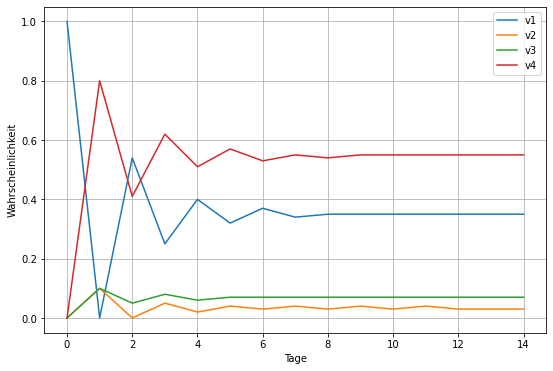

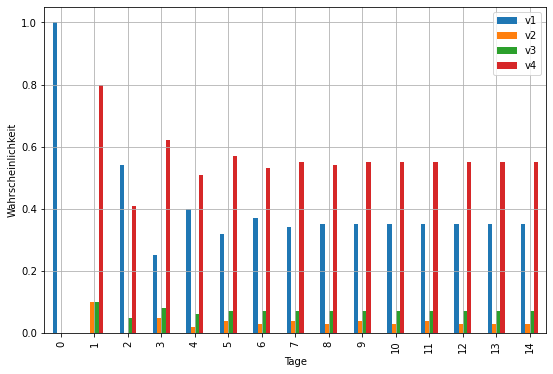

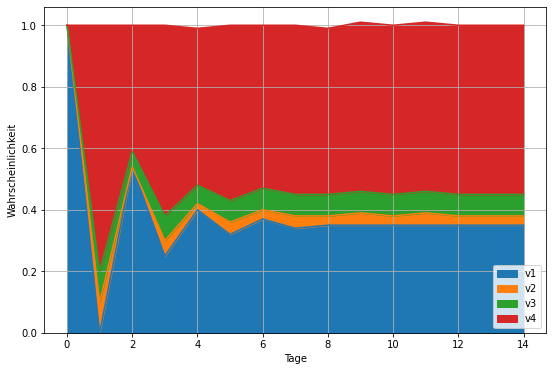

In [10]:
for i in ['line', 'bar', 'area']:
    df.plot(kind=i, grid=True, figsize=(9,6), xlabel='Tage', ylabel='Wahrscheinlichkeit')

#### Antwort : Die GSG 9 sollte v4 stürmen und Jonny Controlletti zu 55% dort antreffen.

### Aufgabe 2 (Page Rank)

#### Daten:

In [11]:
names = np.array([
"Mohamed Atta",
"Ziad Jarrah",
"Marwan Al-Shehhi",
"Mamoun Darkazanli",
"Zakariya Essabar",
"Said Bahaji",
"Mounir El Motassadeq",
"Zacarias Moussaoui",
"Ramzi Bin al-Shibh",
"Agus Budiman",
"Ahmed Khalil Ibrahim Samir Al-Ani",
"Lotfi Raissi",
"Salem Alhazmi",
"Hani Hanjour",
"Rayed Mohammed Abdullah",
"Bandar Alhazmi",
"Faisal Al Salmi",
"Majed Moqed",
"Khalid Al-Mihdhar",
"Osama Awadallah",
"Abdussattar Shaikh",
"Nawaf Alhazmi",
"Mohamed Abdi",
"Ahmed Al Haznawi",
"Ahmed Alnami",
"Hamza Alghamdi",
"Saeed Alghamdi",
"Ahmed Alghamdi",
"Nabil al-Marabh",
"Raed Hijazi",
"Mohand Alshehri",
"Fayez Ahmed",
"Mustafa Ahmed al-Hisawi",
"Abdul Aziz Al-Omari",
"Waleed Alsheri",
"Wail Alsheri",
"Satam Suqami"
])

In [12]:
links = [
    [21, 1, 2, 32, 33, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13],
    [12, 23, 2, 4, 5, 0, 8, 9, 11, 13],
    [31, 32, 33, 3, 4, 5, 6, 8, 9, 0, 11, 1, 13, 12 ],
    [0, 2, 5 ],
    [0, 1, 2, 5, 8 ],
    [0, 1, 2, 4, 3, 6, 8 ],
    [ 0, 2, 5, 8],
    [ 0, 8 ],
    [0, 1, 2, 4, 5, 6, 7, 9 ],
    [0, 1, 2, 8 ],
    [0],
    [0, 1, 2, 13, 14],
    [1, 2, 21 ],
    [18, 21, 2, 1, 0, 11, 14, 15, 16, 17],
    [13, 11, 15, 16],
    [13, 14 ],
    [13, 14 ],
    [13],
    [20, 21, 13, 19],
    [20, 21, 18 ],
    [21, 18, 19],
    [ 0, 22, 24, 25, 26, 12, 13, 18, 19, 20 ],
    [21],
    [ 1, 26, 25],
    [ 26, 25, 21],
    [27, 26, 30, 23, 21, 24],
    [29, 28, 23, 21, 25, 24 ],
    [ 28, 25 ],
    [36, 29, 26, 27 ],
    [36, 28, 26 ],
    [31, 25 ],
    [32, 2, 30],
    [34, 0, 2, 31],
    [34, 0, 2 ],
    [35, 36, 33, 32],
    [36, 34 ],
    [35, 34, 29, 28] ]

mat = np.zeros((37,37))

for rownr, row in enumerate(links):
    for i in range(0,37):
        if len(row)!=37: row.append(100)
    for i, val in enumerate(sorted(row)):
        if (val != 100): mat[rownr][val] = 1

#### Darstellung der Zusammenhänger der Terrorzellen als Matrix, wobei eine eins eine intakte Verbindung repräsentiert.

In [13]:
df = pd.DataFrame(mat, columns=names)
df = df.set_index(names, drop=True)
df = df.fillna('-')
df.iloc[0:11, 0:8]
df

,Mohamed Atta,Ziad Jarrah,Marwan Al-Shehhi,Mamoun Darkazanli,Zakariya Essabar,Said Bahaji,Mounir El Motassadeq,Zacarias Moussaoui,Ramzi Bin al-Shibh,Agus Budiman,...,Ahmed Alghamdi,Nabil al-Marabh,Raed Hijazi,Mohand Alshehri,Fayez Ahmed,Mustafa Ahmed al-Hisawi,Abdul Aziz Al-Omari,Waleed Alsheri,Wail Alsheri,Satam Suqami
Mohamed Atta,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Ziad Jarrah,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Marwan Al-Shehhi,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
Mamoun Darkazanli,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zakariya Essabar,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Said Bahaji,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mounir El Motassadeq,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zacarias Moussaoui,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ramzi Bin al-Shibh,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agus Budiman,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
label = {}
for i in range(37):label[i] = df.index[i]

#### Plotten des Terrornetzwerkes:

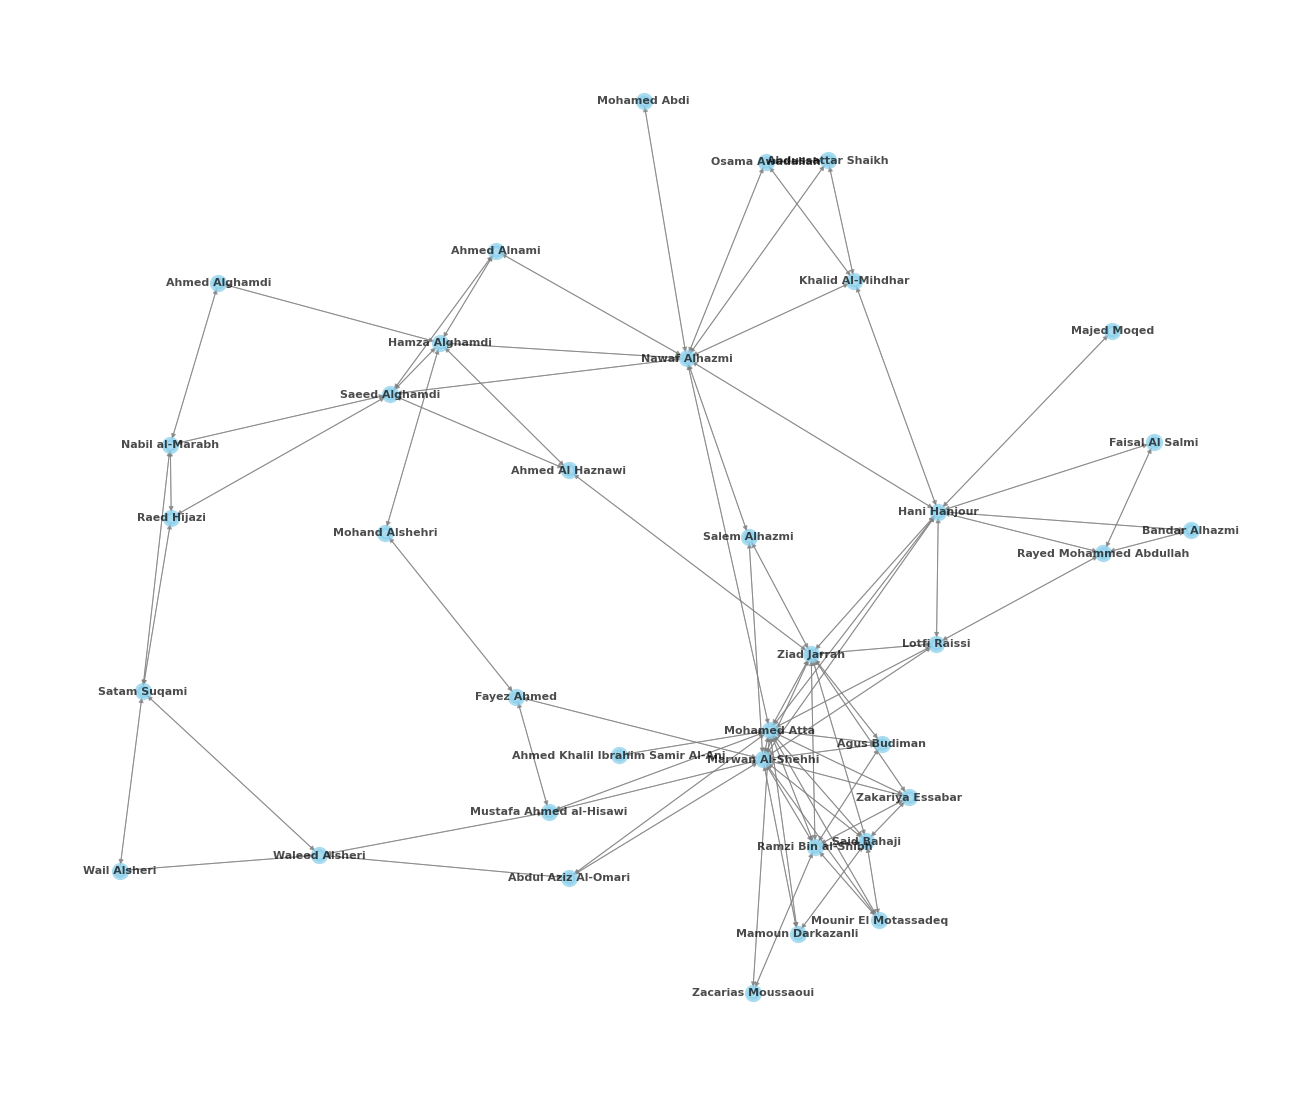

<Figure size 432x288 with 0 Axes>

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

G = nx.DiGraph(df.values)
pos = nx.spring_layout(G, scale=102)
plt.figure(figsize=(18,15)) 

nx.draw(G,pos, with_labels=True, node_size=150, node_color="skyblue", node_shape="o", 
        alpha=0.7, linewidths=5, font_size=11, 
        font_weight="bold", width=1, edge_color="grey", labels=label)

plt.show()
plt.savefig("Graph.png", format="PNG")

In [15]:
g = Network(height=800, width=800, notebook=True)
g.toggle_hide_edges_on_drag(False)
g.from_nx(G)
# g.show('terror.html')

In [ ]:
EWA,EVA = la.eig(A)

#### Berechnung Page Rank

In [34]:
A = np.copy(mat)
for n, row in enumerate(A):
    outdeg =  np.count_nonzero(row)
    for n2, el in enumerate(row):
        A[n][n2] = el/outdeg

In [43]:
n = len(links)
d = .95
brunch = (1-d)/n
I = np.full((n,n),brunch )
p = np.zeros(n).reshape(-1,1)
p[0] = 1

In [41]:
for i in range(n):
    q = np.matmul(A,q)
    tmp = np.matmul(I,p)
    tmp2 = q*d
    p = np.add(tmp,tmp2)
p

array([[0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334],
       [0.08281334]])

array([4., 4., 4., 4., 4.])

### Ausgabe Page Rank

In [479]:
pr = nx.pagerank_numpy(G, alpha=0.95)
v = list(pr.values())
ausgabe = dict(zip(names, v))

ausgabe

{'Mohamed Atta': 0.08281332993431818,
 'Ziad Jarrah': 0.05478622989892179,
 'Marwan Al-Shehhi': 0.07666814330326313,
 'Mamoun Darkazanli': 0.01695203262524468,
 'Zakariya Essabar': 0.02731588272205681,
 'Said Bahaji': 0.03797209604630408,
 'Mounir El Motassadeq': 0.022111190881659283,
 'Zacarias Moussaoui': 0.01175535383693941,
 'Ramzi Bin al-Shibh': 0.04344554321191213,
 'Agus Budiman': 0.022162526830058375,
 'Ahmed Khalil Ibrahim Samir Al-Ani': 0.00659619558052484,
 'Lotfi Raissi': 0.028288937004012398,
 'Salem Alhazmi': 0.017432496918555657,
 'Hani Hanjour': 0.05815527210093382,
 'Rayed Mohammed Abdullah': 0.024256074024336337,
 'Bandar Alhazmi': 0.012636919781719961,
 'Faisal Al Salmi': 0.012636919781719961,
 'Majed Moqed': 0.006876102200940061,
 'Khalid Al-Mihdhar': 0.024441450350043338,
 'Osama Awadallah': 0.018775856171080966,
 'Abdussattar Shaikh': 0.018775856171080966,
 'Nawaf Alhazmi': 0.05972602709563504,
 'Mohamed Abdi': 0.007025323925436684,
 'Ahmed Al Haznawi': 0.01832046